### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor



### Load Dataset


In [3]:
df = pd.read_csv(r"E:/ALL AI Course Files/research paper/data/student-mat.csv", sep=";")

### Encode categorical features

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

### Feature Engineering

In [6]:
df['avg_prev_grades'] = (df['G1'] + df['G2']) / 2
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)
df['health_factor'] = df['health'] * df['Walc']

X = df.drop("G3", axis=1)
y = df["G3"]



### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Models

In [8]:
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

### Load Dataset

In [34]:
df = pd.read_csv(r"E:/ALL AI Course Files/research paper/data/student-mat.csv", sep=";")

### Encode categorical features

In [35]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])



### Feature Engineering

In [36]:
df['avg_prev_grades'] = (df['G1'] + df['G2']) / 2
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)
df['health_factor'] = df['health'] * df['Walc']

X = df.drop("G3", axis=1)
y = df["G3"]



### Train-Test Split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Baseline Models


In [38]:
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

## Random Forest Hyperparameter Tuning

In [39]:

rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=rkf, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_



### Gradient Boosting

In [40]:
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42).fit(X_train, y_train)

### Voting Regressor Ensemble

In [41]:
voting = VotingRegressor([('lr', lr), ('rf', best_rf), ('gbr', gbr)]).fit(X_train, y_train)

### Predictions

In [42]:
predictions = {
    "Linear Regression": lr.predict(X_test),
    "Decision Tree": dt.predict(X_test),
    "Random Forest Tuned": best_rf.predict(X_test),
    "Gradient Boosting": gbr.predict(X_test),
    "Voting Regressor": voting.predict(X_test)
}


### 1. Final Comparison Table

In [43]:
results = pd.DataFrame({
    "Model": list(predictions.keys()),
    "RMSE": [np.sqrt(mean_squared_error(y_test, pred)) for pred in predictions.values()],
    "R2": [r2_score(y_test, pred) for pred in predictions.values()]
})
print("\nFinal Model Comparison:\n", results)



Final Model Comparison:
                  Model      RMSE        R2
0    Linear Regression  2.043652  0.796318
1        Decision Tree  2.116840  0.781468
2  Random Forest Tuned  1.829640  0.836743
3    Gradient Boosting  1.837010  0.835426
4     Voting Regressor  1.775964  0.846182


### 2. Random Forest Feature Importance Plot

C:\Users\✨Laptop✨\AppData\Local\Temp\ipykernel_4104\3750606324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
C:\Users\✨Laptop✨\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\✨Laptop✨\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gr

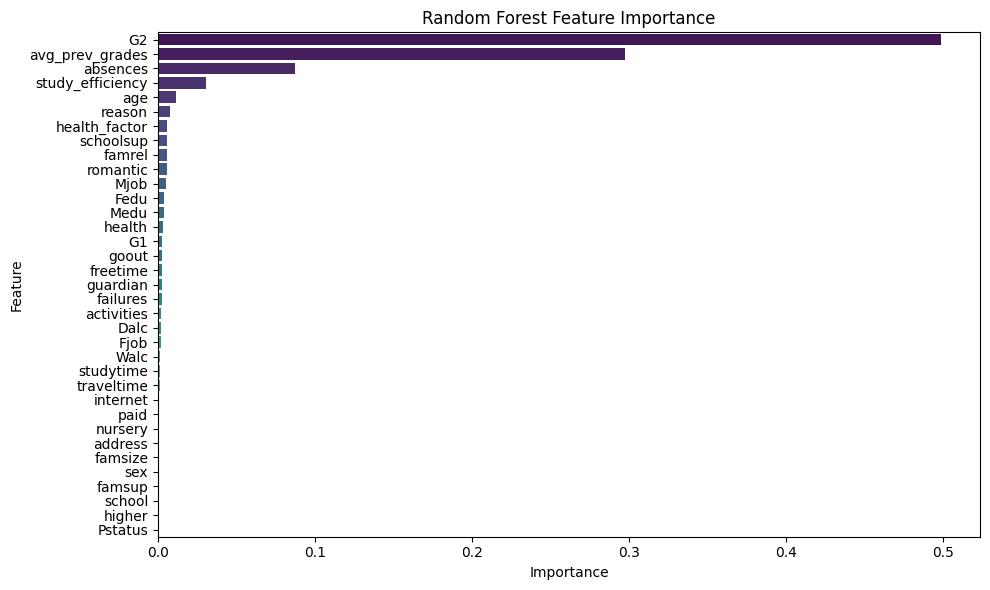

In [44]:
importances = best_rf.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("Feature_Importance.png", dpi=300)
plt.show()




### 3. Predicted vs Actual (Voting Regressor)

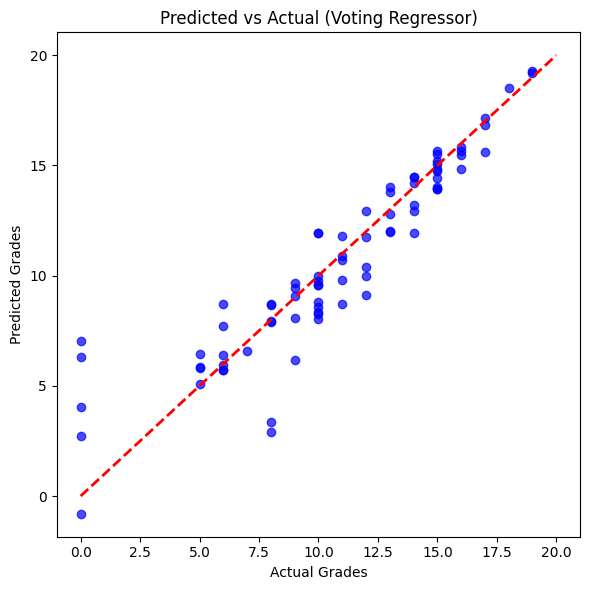

In [45]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions["Voting Regressor"], alpha=0.7, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Predicted vs Actual (Voting Regressor)")
plt.tight_layout()
plt.savefig("Predicted_vs_Actual.png", dpi=300)
plt.show()




### 4. Save Results to CSV



In [46]:
results.to_csv("Model_Comparison.csv", index=False)

print("\n✅ Graphs saved: Feature_Importance.png & Predicted_vs_Actual.png")
print("✅ Model comparison saved: Model_Comparison.csv")



✅ Graphs saved: Feature_Importance.png & Predicted_vs_Actual.png
✅ Model comparison saved: Model_Comparison.csv


# Predicting Student Performance using Machine Learning
- **Field:** AI & Data Science  
- **Level:** Undergraduate  
- **Author:** <i>Muhammad Muneeb</i><br>
- **Date:** Jan 2026


## Introduction
Predicting student performance is crucial for identifying students who may need extra support.  
In this study, we aim to predict the final grade (G3) of students using machine learning techniques.  


## Dataset Description
- Source: UCI Student Performance Dataset
- Number of samples: 395
- Number of features: 33
- Target variable: `G3` (Final Grade)

**Features include:**
- `school` - Student school (binary: 'GP' or 'MS')
- `sex` - Gender ('F' or 'M')
- `age` - Student age
- `studytime` - Weekly study time
- `failures` - Number of past class failures
- `absences` - Number of school absences
- etc...


## Exploratory Data Analysis (EDA)
We analyzed the dataset to understand distributions, correlations, and potential patterns.

- Checked null values  
- Plotted distributions of numerical features  
- Calculated correlation with target variable `G3`


## Feature Engineering
- Encoded categorical variables using One-Hot Encoding  
- Scaled numerical features if needed  
- Selected most relevant features based on correlation and importance


## Model Training
We trained multiple models to predict final grades:

1. Linear Regression  
2. Decision Tree Regressor  
3. Random Forest Regressor (with hyperparameter tuning)  
4. Gradient Boosting Regressor  
5. Voting Regressor (ensemble of top models)


## Hyperparameter Tuning
Random Forest parameters were tuned using Grid Search:
- `n_estimators`: 100, 200, 300  
- `max_depth`: 5, 10, 15  
- `min_samples_split`: 2, 5  
- `min_samples_leaf`: 1, 2  

Best parameters selected based on RMSE and R² score.


## Model Evaluation
Models were evaluated on the test set using:
- RMSE (Root Mean Squared Error)
- R² Score (Coefficient of Determination)

**Results:**
| Model | RMSE | R² |
|-------|------|----|
| Linear Regression | 2.04 | 0.796 |
| Decision Tree | 2.12 | 0.781 |
| Random Forest (Tuned) | 1.83 | 0.837 |
| Gradient Boosting | 1.84 | 0.835 |
| Voting Regressor | 1.78 | 0.846 |


## Conclusion
- Voting Regressor performed best with R² = 0.846 and RMSE = 1.78  
- Most important features affecting student performance: study time, failures, absences, past grades  
- Model can be used to identify students who may need extra support


## Future Work
- Collect larger datasets from multiple schools  
- Apply deep learning models for sequential grade prediction  
- Build an interactive dashboard for real-time performance monitoring


<img src="../results/Feature_Importance.png" width="500" height="300">
<img src="../results/Predicted_vs_Actual.png" width="500" height="300">
